In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.getcwd() + os.sep + os.pardir)
sys.path.insert(0, PROJECT_ROOT)

from benchmarks import *

IMAGE_ROOT = os.path.join(PROJECT_ROOT, "plots", "benchmarks")

In [22]:
MAX_EPOCHS = 500
MAX_TRIALS = 100
DESC = "edited"
TUNER = "RandomSearch"  # "Hyperband" or "BayesianOptimization" or "RandomSearch" or "origin"

TUNER_STRING = TUNER + "." + str(MAX_EPOCHS) + "me" + str(MAX_TRIALS) + "mt." + DESC
benchmarks = BenchmarksDB(load_path=os.path.join(IMAGE_ROOT, "benchmarks." + TUNER_STRING + ".json"), plot_path="/tmp/plots/" + TUNER_STRING)
print(benchmarks.list_datasets())
print(benchmarks.list_classes())
print(benchmarks.list_experiments())
print(benchmarks.list_models())

['ArticularyWordRecognition', 'CharacterTrajectories', 'Libras', 'SpokenArabicDigits']
['Multiple S.R. 100 Trials', 'Multiple S.R. 200 Trials', 'Multiple S.R. 500 Trials', 'Single S.R. 100 Trials']
['Units', 'Units 50', 'Units 75', 'Units 100', 'Units 150', 'Units 250']
['ESN', 'IRESN', 'IIRESN', 'IIRESNvsr']


In [23]:
benchmarks.plot_global_summary_table()

/tmp/plots/RandomSearch.500me100mt.edited/summary_table.svg


/dati/luca/Uni-Luca/Tesi/progetto/notebooks/benchmarks.py:235: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


True

/tmp/plots/RandomSearch.500me100mt.edited/datasets_summary_multiple_s.r._100_trials_units_50.svg
/tmp/plots/RandomSearch.500me100mt.edited/datasets_summary_multiple_s.r._100_trials_units_75.svg
/tmp/plots/RandomSearch.500me100mt.edited/ArticularyWordRecognition/multiple_s.r._100_trials/summary_plots.svg
/tmp/plots/RandomSearch.500me100mt.edited/ArticularyWordRecognition/multiple_s.r._100_trials/summary_histograms.svg
/tmp/plots/RandomSearch.500me100mt.edited/ArticularyWordRecognition/multiple_s.r._100_trials/summary_table.svg
/tmp/plots/RandomSearch.500me100mt.edited/ArticularyWordRecognition/multiple_s.r._100_trials/hp_table_by_units_50.svg
/tmp/plots/RandomSearch.500me100mt.edited/ArticularyWordRecognition/multiple_s.r._100_trials/hp_table_by_units_75.svg
/tmp/plots/RandomSearch.500me100mt.edited/ArticularyWordRecognition/multiple_s.r._100_trials/hp_table_by_units_100.svg
/tmp/plots/RandomSearch.500me100mt.edited/ArticularyWordRecognition/multiple_s.r._100_trials/hp_table_by_units_15

ZeroDivisionError: float division by zero

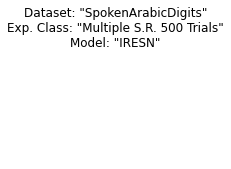

In [24]:
%%time

hp = ['units', 'spectral radius', 'connectivity', 'G.S.R.', 'bias scaling', 'input scaling', 'leaky', 'learning', 'partition']

for class_name in benchmarks.list_classes():
    for experiment_name in benchmarks.list_experiments():
        benchmarks.plot_datasets_summary(class_name=class_name, experiment=experiment_name, show=False)

for dataset in benchmarks.list_datasets():
    for class_name in benchmarks.list_classes():
        success = benchmarks.plot_lines_by_key(dataset, class_name, show=False)
        if not success:
            continue
        benchmarks.plot_summary_histogram(dataset, class_name, show=False)

        #benchmarks.plot_by_experiment(dataset, class_name, show=False)
        #benchmarks.plot_by_model(dataset, class_name, show=False)

        benchmarks.plot_summary_table(dataset, class_name, show=False)

        for experiment in benchmarks.list_experiments():
            benchmarks.plot_hp_table_by_experiment(dataset, class_name, experiment, hp, show=False)
        for model in benchmarks.list_models():
            benchmarks.plot_hp_table_by_model(dataset, class_name, model, hp, show=False)
